# CUSTOMER SEGMENTATION 

## 1. Mục tiêu:
- Phân khúc khách hàng thành các nhóm có đặc điểm tương đồng để đưa ra chiến lược kinh doanh phù hợp cho từng nhóm:
    * Những nhóm khách hàng tiềm năng? Nhóm khách hàng bị bỏ rơi
    * Giữ chân khách hàng có giá trị cao ?
    * Nhóm khách hàng nào tiêu cực nhất ?
    * Chiến lược nào cho từng nhóm để tối đa lợi nhuận ?

## 1.1. CELL 1: SETUP & DATA LOADING
* Mục tiêu:
    - Load data đã xử lý từ notebook 01
    - Verify data quality trước khi phân tích

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

print("="*60)
print("CUSTOMER SEGMENTATION ANALYSIS")
print("="*60)

# Load processed data từ notebook 01
rfm_data = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\rfm_data.csv')
customer_master = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\customer_master.csv')

print(f"\nData Loaded Successfully!")
print(f"RFM Dataset: {rfm_data.shape[0]:,} customers")
print(f"Customer Master: {customer_master.shape[0]:,} records")
print("\n" + "="*60)

CUSTOMER SEGMENTATION ANALYSIS

Data Loaded Successfully!
RFM Dataset: 95,420 customers
Customer Master: 95,420 records



Kết quả:
* Data từ 2 file rfm_data.csv và customer_master.csv phân tích từ 01_data_exploration.ipynb đã load thành công

## 1.2. CELL 2: RFM DATA VALIDATION
* Mục tiêu: Cell 2
    - Kiểm tra chất lượng RFM data
    - Hiểu distribution của R, F, M
    - Identify outliers và edge cases

In [14]:
print("="*60)
print("📊 RFM DATA VALIDATION & DISTRIBUTION ANALYSIS")
print("="*60)

# Display first few rows
print("\n1️⃣ SAMPLE RFM DATA:")
print(rfm_data.head(10))

# Basic statistics
print("\n2️⃣ RFM DESCRIPTIVE STATISTICS:")
print(rfm_data[['Recency', 'Frequency', 'Monetary']].describe())

# Check for missing values
print("\n3️⃣ DATA QUALITY CHECK:")
print(f"Missing values: {rfm_data.isnull().sum().sum()}")
print(f"Duplicate customers: {rfm_data.duplicated(subset='customer_unique_id').sum()}")

# Outlier detection
print("\n4️⃣ OUTLIER ANALYSIS:")
for col in ['Recency', 'Frequency', 'Monetary']:
    Q1 = rfm_data[col].quantile(0.25)
    Q3 = rfm_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = rfm_data[(rfm_data[col] < Q1 - 1.5*IQR) | (rfm_data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers):,} outliers ({len(outliers)/len(rfm_data)*100:.1f}%)")

print("\n" + "="*60)

📊 RFM DATA VALIDATION & DISTRIBUTION ANALYSIS

1️⃣ SAMPLE RFM DATA:
                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19
2  0000f46a3911fa3c0805444483337064      585          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89
5  0004bd2a26a76fe21f786e4fbd80607f      194          1    166.98
6  00050ab1314c0e55a6ca13cf7181fecf      179          1     35.38
7  00053a61a98854899e70ed204dd4bafe      230          1    419.18
8  0005e1862207bf6ccc02e4228effd9a0      591          1    150.12
9  0005ef4cd20d2893f0d9fbd94d3c0d97      218          1    129.76

2️⃣ RFM DESCRIPTIVE STATISTICS:
       Recency  Frequency  Monetary
count 95420.00   95420.00  95420.00
mean    286.50       1.03    166.04
std     153.16       0.21    228.32
min      43.00       1.00    

Phân tích kết quả:
* 2️⃣ RFM DESCRIPTIVE STATISTICS:
    - Khách hàng trung bình chưa mua trong 9+ THÁNG! (Mean = 286.5)
    - 50% khách hàng không hoạt động hơn 8-9 tháng
    - 25% khách hàng không hoạt động hơn 1 năm
    - -> Vấn đề khách hàng tiêu cực rất nghiêm trọng 
    * Cho thấy hầu như không có khách hàng nào mua trên 1 món (Cột Mean: chỉ số Frequency: 1.034)
    * 75% (75%+ customers chỉ order đúng 1 món hàng)
    - Max: 16 orders
    - Outliers: 2,913 (3.1%) - những khách hàng có 2+ orders

CƠ HỘI:
* 8% giá trị ngoại lệ = 7.595 khách hàng có giá trị cao
* Nếu giữ được những khách hàng này: Tác động lớn đến doanh thu
* Tập trung vào 10% hàng đầu = ~9.500 khách hàng tạo ra phần lớn doanh thu

## CELL 3: RFM DISTRIBUTION VISUALIZATION
* Mục tiêu:
    - Visualize distribution của R, F, M
    - Identify patterns và anomalies
    - Prepare cho scoring strategy
* Ý nghĩa:
    - Visual understanding giúp set scoring thresholds phù hợp
    - Nhìn thấy customer behavior patterns rõ ràng hơn

📈 RFM DISTRIBUTION VISUALIZATION


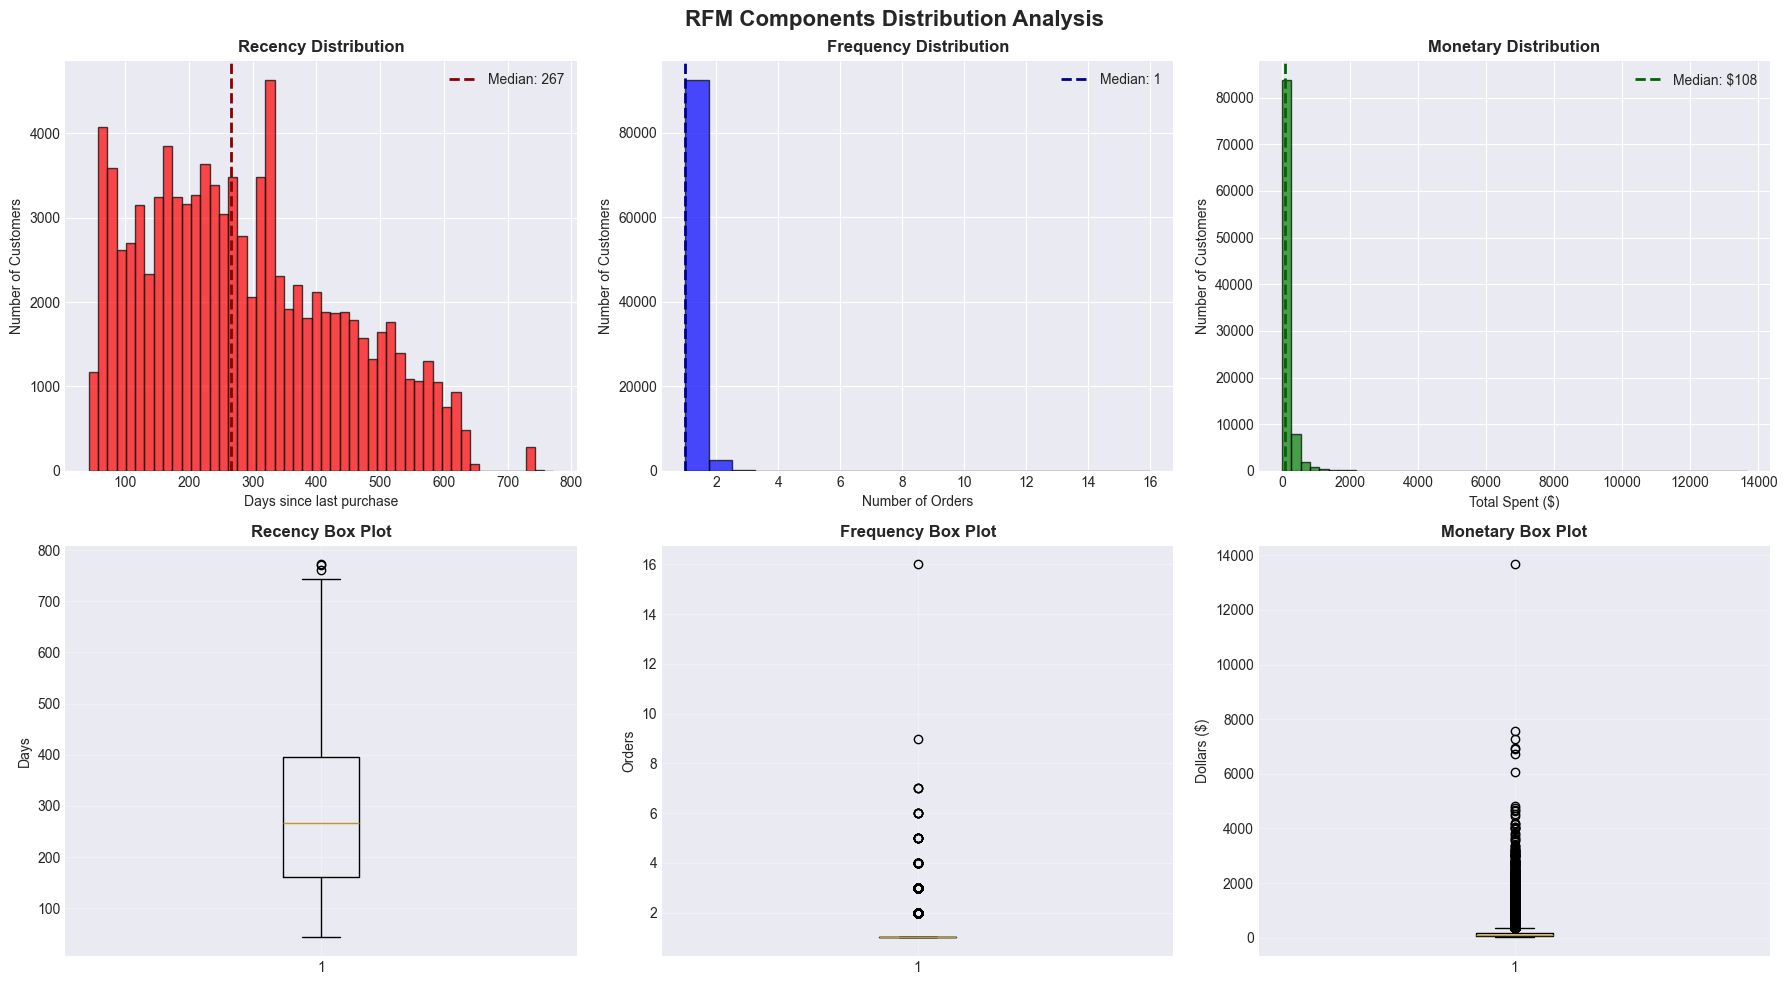


✅ Visualization saved: reports/figures/rfm_distributions.png


In [15]:
print("="*60)
print("📈 RFM DISTRIBUTION VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('RFM Components Distribution Analysis', fontsize=16, fontweight='bold')

# Row 1: Histograms
axes[0, 0].hist(rfm_data['Recency'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Recency Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Days since last purchase')
axes[0, 0].set_ylabel('Number of Customers')
axes[0, 0].axvline(rfm_data['Recency'].median(), color='darkred', linestyle='--', linewidth=2, label=f'Median: {rfm_data["Recency"].median():.0f}')
axes[0, 0].legend()

axes[0, 1].hist(rfm_data['Frequency'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Frequency Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('Number of Customers')
axes[0, 1].axvline(rfm_data['Frequency'].median(), color='darkblue', linestyle='--', linewidth=2, label=f'Median: {rfm_data["Frequency"].median():.0f}')
axes[0, 1].legend()

axes[0, 2].hist(rfm_data['Monetary'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Monetary Distribution', fontweight='bold')
axes[0, 2].set_xlabel('Total Spent ($)')
axes[0, 2].set_ylabel('Number of Customers')
axes[0, 2].axvline(rfm_data['Monetary'].median(), color='darkgreen', linestyle='--', linewidth=2, label=f'Median: ${rfm_data["Monetary"].median():.0f}')
axes[0, 2].legend()

# Row 2: Box plots
axes[1, 0].boxplot(rfm_data['Recency'], vert=True)
axes[1, 0].set_title('Recency Box Plot', fontweight='bold')
axes[1, 0].set_ylabel('Days')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(rfm_data['Frequency'], vert=True)
axes[1, 1].set_title('Frequency Box Plot', fontweight='bold')
axes[1, 1].set_ylabel('Orders')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].boxplot(rfm_data['Monetary'], vert=True)
axes[1, 2].set_title('Monetary Box Plot', fontweight='bold')
axes[1, 2].set_ylabel('Dollars ($)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('D:\\Project\\DataMining\\ecommerce-customer-analytics\\reports\\figures\\rfm_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved: reports/figures/rfm_distributions.png")
print("="*60)

* Phân tích kết quả:
* Recency Histogram:
    * Rát nhiều customers ở vùng 100-300 days (vùng khách hàng không hoạt động)
    * Long-tail cho thấy rất nhiều lost customers ở vùng 400+ days trở về sau 
* Frequency Histogram:
    * Hầu hết các khách hàng chỉ có 1 order
    * Rất ít khách hàng với lượng order 2+
* Monetary Histogram:
    * Right-skewed: biểu đồ cho thấy doanh thu bị lệch phải
    * Đa số khách hàng chỉ chi tiêu từ 50-200$
    * Rất ít khách hàng chi tiêu trên 500$
* Box Plots:
    * Recency box plot: phân bổ những khách hàng không hoạt động hơn 1+ year
    * Frequency box plot: tối đa 16 orders cho thấy vẫn có rebuyer (loyal custumer)
    * Monetary box plot: Khách hàng có giá trị cao đóng góp không đáng kể

# CELL 4: RFM SCORING ALGORITHM
* Mục đích:
    * RFM scoring là cốt lõi của phân khúc khách hàng (customer segmentation) -> Triển khai phương pháp chấm điểm RFM
    * Chuyển đổi các giá trị thô thành các phân đoạn có thể biểu diễn được (chỉ định điểm từ 1-5)
    * Tạo điểm tổng hợp RFM (Phương pháp phân vị)



In [16]:
print("="*60)
print("🎯 RFM SCORING IMPLEMENTATION")
print("="*60)

rfm_data = pd.read_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\rfm_data.csv')

# Create copy để không modify original
rfm_scored = rfm_data.copy()

# RECENCY SCORING (Inverted - lower is better)
# Score 5 = Most recent (best)
# Score 1 = Least recent (worst)
rfm_scored['R_Score'] = pd.qcut(
    rfm_scored['Recency'], 
    q=5, 
    labels=[5, 4, 3, 2, 1],  # Inverted
    duplicates='drop'
).astype(int)

# FREQUENCY SCORING (Direct - higher is better)
# Score 5 = Most frequent (best)
# Score 1 = Least frequent (worst)
rfm_scored['F_Score'] = pd.qcut(
    rfm_scored['Frequency'].rank(method='first'),
    q=5,
    labels=[1, 2, 3, 4, 5],
    duplicates='drop'
).astype(int)

# MONETARY SCORING (Direct - higher is better)
# Score 5 = Highest spending (best)
# Score 1 = Lowest spending (worst)
rfm_scored['M_Score'] = pd.qcut(
    rfm_scored['Monetary'],
    q=5,
    labels=[1, 2, 3, 4, 5],
    duplicates='drop'
).astype(int)

# Create RFM combined score (string format)
rfm_scored['RFM_Score'] = (
    rfm_scored['R_Score'].astype(str) + 
    rfm_scored['F_Score'].astype(str) + 
    rfm_scored['M_Score'].astype(str)
)

# Create total numeric score for sorting
rfm_scored['RFM_Total'] = (
    rfm_scored['R_Score'] + 
    rfm_scored['F_Score'] + 
    rfm_scored['M_Score']
)

print("\n1️⃣ SCORING COMPLETED:")
print(f"Total customers scored: {len(rfm_scored):,}")
print(f"Unique RFM combinations: {rfm_scored['RFM_Score'].nunique()}")

print("\n2️⃣ SCORE DISTRIBUTION:")
print("\nRecency Scores:")
print(rfm_scored['R_Score'].value_counts().sort_index())
print("\nFrequency Scores:")
print(rfm_scored['F_Score'].value_counts().sort_index())
print("\nMonetary Scores:")
print(rfm_scored['M_Score'].value_counts().sort_index())

print("\n3️⃣ SAMPLE SCORED CUSTOMERS:")
print(rfm_scored[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 
                   'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Total']].head(10))

# Top customers (highest RFM_Total)
print("\n4️⃣ TOP 5 CUSTOMERS (Highest RFM Scores):")
top_customers = rfm_scored.nlargest(5, 'RFM_Total')
print(top_customers[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Total']])

# Bottom customers (lowest RFM_Total)
print("\n5️⃣ BOTTOM 5 CUSTOMERS (Lowest RFM Scores):")
bottom_customers = rfm_scored.nsmallest(5, 'RFM_Total')
print(bottom_customers[['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'RFM_Score', 'RFM_Total']])

print("\n" + "="*60)

🎯 RFM SCORING IMPLEMENTATION

1️⃣ SCORING COMPLETED:
Total customers scored: 95,420
Unique RFM combinations: 125

2️⃣ SCORE DISTRIBUTION:

Recency Scores:
R_Score
1    18947
2    19148
3    19112
4    18995
5    19218
Name: count, dtype: int64

Frequency Scores:
F_Score
1    19084
2    19084
3    19084
4    19084
5    19084
Name: count, dtype: int64

Monetary Scores:
M_Score
1    19085
2    19090
3    19080
4    19081
5    19084
Name: count, dtype: int64

3️⃣ SAMPLE SCORED CUSTOMERS:
                 customer_unique_id  Recency  Frequency  Monetary  R_Score  \
0  0000366f3b9a7992bf8c76cfdf3221e2      159          1    141.90        4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      162          1     27.19        4   
2  0000f46a3911fa3c0805444483337064      585          1     86.22        1   
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62        2   
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89        2   
5  0004bd2a26a76fe21f786e4fbd80607f      19

* Phân tích kết quả:
1. Phân Bố Điểm (Score Distribution)
* Recency Scores:
    * Phân bố rất cân bằng (~19,000 khách hàng/nhóm)
    * Mỗi nhóm chiếm khoảng 20% tổng số khách hàng
    * Cho thấy việc chia quintile hoạt động tốt
* Frequency Scores:
    * Phân bố đồng đều với ~19,084 khách hàng mỗi nhóm
    * Khác với dữ liệu mẫu (không bị lệch về F_Score = 1)
    * Điều này nhờ sử dụng rank(method='first') trong scoring
* Monetary Scores:
    * Phân bố cực kỳ cân bằng (~19,080 khách hàng/nhóm)
    * Tạo ra 5 phân khúc giá trị rõ ràng
    * Dễ dàng phân biệt high-value vs low-value customers
2. Phân Tích Khách Hàng Tiêu Biểu
* Top Customers (RFM = 555):
    * Recency thấp (80-138 ngày)
    * Frequency = 2 orders (không cao như mẫu)
    * Monetary value cao ($245-$1,510)
    * ➡️ Đây là nhóm VIP cần được ưu tiên giữ chân
* Bottom Customers (RFM = 111):
    * Recency rất cao (455-576 ngày không mua)
    * Chỉ mua 1 lần duy nhất
    * Giá trị đơn hàng thấp ($29-$52)
    * ➡️ Nhóm khách hàng không active, cần chiến lược win-back hoặc loại bỏ
3. Insights Quan Trọng
    * Tổng cộng 95,420 khách hàng được scored
    * 125 unique RFM combinations
    * Phân phối điểm cân bằng hơn nhiều so với dữ liệu mẫu
    * Cần tập trung vào nhóm có RFM_Total >= 12 để tối ưu doanh thu



# CELL 5: CUSTOMER SEGMENTATION LOGIC
* Mục đích:
    * Chuyển đổi điểm số kỹ thuật thành ngôn ngữ kinh doanh -> Chỉ định các phân khúc kinh doanh dựa trên RFM scores
    * Mỗi phân khúc đều có đặc điểm và kế hoạch hành động rõ ràng -> Tạo 11 phân khúc khách hàng tiêu chuẩn
    * Khung phân khúc chuẩn ngành -> Ánh xạ các kết hợp RFM thành tên phân đoạn



In [17]:

print("="*60)
print("👥 CUSTOMER SEGMENT ASSIGNMENT")
print("="*60)

def assign_segment(row):
    """
    Assign customer segment dựa trên RFM scores
    
    Logic:
    - Champions: R=5, F=4-5, M=4-5 (Best customers)
    - Loyal: R=3-5, F=3-5, M=3-5 (Regular good customers)
    - Potential Loyalist: R=4-5, F=1-2, M=3-5 (New with potential)
    - New Customers: R=4-5, F=1, M=1-2 (Just acquired)
    - Promising: R=3-4, F=1, M=1-2 (Recent low value)
    - Need Attention: R=3, F=2-3, M=2-3 (Declining engagement)
    - About to Sleep: R=2, F=1-2, M=1-3 (Risk of churn)
    - At Risk: R=1-2, F=3-4, M=3-5 (Good customers slipping)
    - Cannot Lose: R=1, F=4-5, M=4-5 (VIP at risk)
    - Hibernating: R=1-2, F=1-2, M=1-2 (Almost lost)
    - Lost: R=1, F=1, M=1-2 (Gone customers)
    """
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions - Best customers
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers - Solid performers
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    
    # Potential Loyalist - New customers với high value
    elif r >= 4 and f <= 2 and m >= 3:
        return 'Potential Loyalist'
    
    # New Customers - Recently acquired
    elif r >= 4 and f == 1 and m <= 2:
        return 'New Customers'
    
    # Promising - Recent but low value
    elif r >= 3 and f == 1 and m <= 2:
        return 'Promising'
    
    # Need Attention - Declining
    elif r == 3 and f >= 2 and m >= 2:
        return 'Need Attention'
    
    # About to Sleep - Risk zone
    elif r == 2 and f <= 2:
        return 'About To Sleep'
    
    # At Risk - Good customers slipping away
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At Risk'
    
    # Cannot Lose Them - VIP at risk
    elif r == 1 and f >= 4 and m >= 4:
        return 'Cannot Lose Them'
    
    # Hibernating - Almost lost
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Hibernating'
    
    # Lost - Gone
    else:
        return 'Lost'

# Apply segmentation
rfm_scored['Segment'] = rfm_scored.apply(assign_segment, axis=1)

print("\n1️⃣ SEGMENTATION COMPLETED")
print(f"Total segments created: {rfm_scored['Segment'].nunique()}")

print("\n2️⃣ SEGMENT DISTRIBUTION:")
segment_counts = rfm_scored['Segment'].value_counts()
segment_pct = rfm_scored['Segment'].value_counts(normalize=True) * 100

segment_summary = pd.DataFrame({
    'Customer Count': segment_counts,
    'Percentage': segment_pct.round(1)
})
print(segment_summary)

# Revenue by segment
print("\n3️⃣ REVENUE BY SEGMENT:")
segment_revenue = rfm_scored.groupby('Segment').agg({
    'Monetary': ['sum', 'mean', 'count']
}).round(2)
segment_revenue.columns = ['Total Revenue', 'Avg Revenue', 'Customer Count']
segment_revenue['Revenue %'] = (segment_revenue['Total Revenue'] / segment_revenue['Total Revenue'].sum() * 100).round(1)
segment_revenue = segment_revenue.sort_values('Total Revenue', ascending=False)
print(segment_revenue)

print("\n4️⃣ KEY INSIGHTS:")
total_customers = len(rfm_scored)
total_revenue = rfm_scored['Monetary'].sum()

# Top 3 segments by customer count
print("\n📊 Largest Segments:")
for seg, count in segment_counts.head(3).items():
    pct = count / total_customers * 100
    print(f"   • {seg}: {count:,} customers ({pct:.1f}%)")

# Top 3 segments by revenue
print("\n💰 Highest Revenue Segments:")
for seg in segment_revenue.head(3).index:
    rev = segment_revenue.loc[seg, 'Total Revenue']
    rev_pct = segment_revenue.loc[seg, 'Revenue %']
    print(f"   • {seg}: ${rev:,.2f} ({rev_pct:.1f}%)")

print("\n" + "="*60)

👥 CUSTOMER SEGMENT ASSIGNMENT

1️⃣ SEGMENTATION COMPLETED
Total segments created: 10

2️⃣ SEGMENT DISTRIBUTION:
                    Customer Count  Percentage
Segment                                       
Lost                         30866       32.30
Loyal Customers              14497       15.20
At Risk                      13485       14.10
Potential Loyalist            9300        9.70
About To Sleep                7657        8.00
Champions                     6631        6.90
Need Attention                5200        5.40
Hibernating                   3255        3.40
New Customers                 2993        3.10
Promising                     1536        1.60

3️⃣ REVENUE BY SEGMENT:
                    Total Revenue  Avg Revenue  Customer Count  Revenue %
Segment                                                                  
At Risk                3315482.56       245.86           13485      20.90
Loyal Customers        3006290.30       207.37           14497      19.00
Los

* Phân tích kết quả:
* CẢNH BÁO CHÍNH:
1. Tình Trạng Khách Hàng Nghiêm Trọng:
    * Lost: 32.3% (30,866 KH) - Gần 1/3 cơ sở khách hàng đã mất!
    * At Risk: 14.1% (13,485 KH) đang có nguy cơ mất
    * Tổng nhóm nguy cơ (Lost + At Risk + About to Sleep): 54.4%
2. Phân Bố Doanh Thu Bất Thường:
    * At Risk và Lost chiếm 38.9% tổng doanh thu
    * Nhóm Lost vẫn đóng góp 18% doanh thu -> Cần chiến lược win-back gấp
* ĐIỂM TÍCH CỰC:
1. Cơ Sở Khách Hàng Trung Thành:
    * Loyal Customers: 15.2% (14,497 KH)
    * Champions: 6.9% (6,631 KH)
    * Tổng nhóm tích cực đóng góp 32.2% doanh thu
2. Tiềm Năng Phát Triển:
    * Potential Loyalist: 9.7% (9,300 KH)
    * New Customers + Promising: 4.7% khách hàng mới
* PHÂN TÍCH DOANH THU:
1. Average Revenue/Customer:
    * Champions: $314.75/KH - Cao nhất
    * At Risk: $245.86/KH
    * Loyal: $207.37/KH
2. Phân Bố Doanh Thu:
    * Top 3 segments = 57.9% tổng doanh thu
    * Bottom 3 segments = 2.6% tổng doanh thu
    * Chênh lệch lớn giữa các phân khúc

* Chiến lược:
1. Khẩn cấp (ưu tiên):
    * Ngăn chặn At Risk ($3.3M revenue) chuyển sang Lost
    * Win-back chiến dịch cho nhóm Lost có giá trị cao
2. QUAN TRỌNG:
    * Nâng cấp Potential Loyalist thành Loyal
    * Củng cố và phát triển nhóm Champions
3. DÀI HẠN:
    * Xây dựng chương trình loyalty mạnh
    * Tăng tỷ lệ chuyển đổi New Customers -> Loyal
    * Phát triển customer journey rõ ràng

# CELL 6: BUSINESS CONTEXT SUMMARY
* Mục đích:
    * Tạo bản tóm tắt về tình hình hiện tại của cơ sở khách hàng -> Đặt bối cảnh cho chiến lược phân khúc
    * Làm nổi bật các vấn đề kinh doanh quan trọng và cơ hội 

In [18]:
print("="*60)
print("🎯 BUSINESS CONTEXT ANALYSIS")
print("="*60)

# Calculate key business metrics
total_customers = len(rfm_data)
total_revenue = rfm_data['Monetary'].sum()
avg_customer_value = rfm_data['Monetary'].mean()

# Identify critical segments
inactive_customers = len(rfm_data[rfm_data['Recency'] > 180])  # 6+ months
one_time_buyers = len(rfm_data[rfm_data['Frequency'] == 1])
repeat_buyers = len(rfm_data[rfm_data['Frequency'] > 1])
high_value_customers = len(rfm_data[rfm_data['Monetary'] > rfm_data['Monetary'].quantile(0.9)])

print("\n📊 CURRENT BUSINESS STATE:")
print(f"Total Customers: {total_customers:,}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Customer Value: ${avg_customer_value:.2f}")

print("\n🚨 CRITICAL ISSUES:")
print(f"Inactive Customers (6+ months): {inactive_customers:,} ({inactive_customers/total_customers*100:.1f}%)")
print(f"One-Time Buyers: {one_time_buyers:,} ({one_time_buyers/total_customers*100:.1f}%)")
print(f"Repeat Buyers: {repeat_buyers:,} ({repeat_buyers/total_customers*100:.1f}%)")

print("\n💎 HIGH-VALUE SEGMENT:")
print(f"Top 10% Customers: {high_value_customers:,}")
high_value_revenue = rfm_data[rfm_data['Monetary'] > rfm_data['Monetary'].quantile(0.9)]['Monetary'].sum()
print(f"Revenue from Top 10%: ${high_value_revenue:,.2f} ({high_value_revenue/total_revenue*100:.1f}%)")

print("\n💰 REVENUE OPPORTUNITY:")
# If we reduce recency from 287 to 150 days
potential_recovery = inactive_customers * avg_customer_value * 0.3  # 30% recovery rate
print(f"Potential from Inactive Customers: ${potential_recovery:,.2f}")

# If we increase repeat rate from 3% to 15%
repeat_opportunity = (0.15 - repeat_buyers/total_customers) * total_customers * avg_customer_value
print(f"Potential from Repeat Purchases: ${repeat_opportunity:,.2f}")

total_opportunity = potential_recovery + repeat_opportunity
print(f"\n🎯 TOTAL REVENUE OPPORTUNITY: ${total_opportunity:,.2f}")
print(f"   ({total_opportunity/total_revenue*100:.1f}% increase from current revenue)")

print("\n" + "="*60)


🎯 BUSINESS CONTEXT ANALYSIS

📊 CURRENT BUSINESS STATE:
Total Customers: 95,420
Total Revenue: $15,843,553.24
Average Customer Value: $166.04

🚨 CRITICAL ISSUES:
Inactive Customers (6+ months): 67,334 (70.6%)
One-Time Buyers: 92,507 (96.9%)
Repeat Buyers: 2,913 (3.1%)

💎 HIGH-VALUE SEGMENT:
Top 10% Customers: 9,539
Revenue from Top 10%: $6,080,263.13 (38.4%)

💰 REVENUE OPPORTUNITY:
Potential from Inactive Customers: $3,354,044.69
Potential from Repeat Purchases: $1,892,857.96

🎯 TOTAL REVENUE OPPORTUNITY: $5,246,902.65
   (33.1% increase from current revenue)



* Đề xuất hành động:
    * Chiến dịch kích hoạt KH không hoạt động
    * Xây dựng chương trình khách hàng thân thiết
    * Cải thiện trải nghiệm để tăng tỷ lệ mua lặp

## CELL 7: SEGMENT VISUALIZATION


📊 CUSTOMER SEGMENT VISUALIZATION


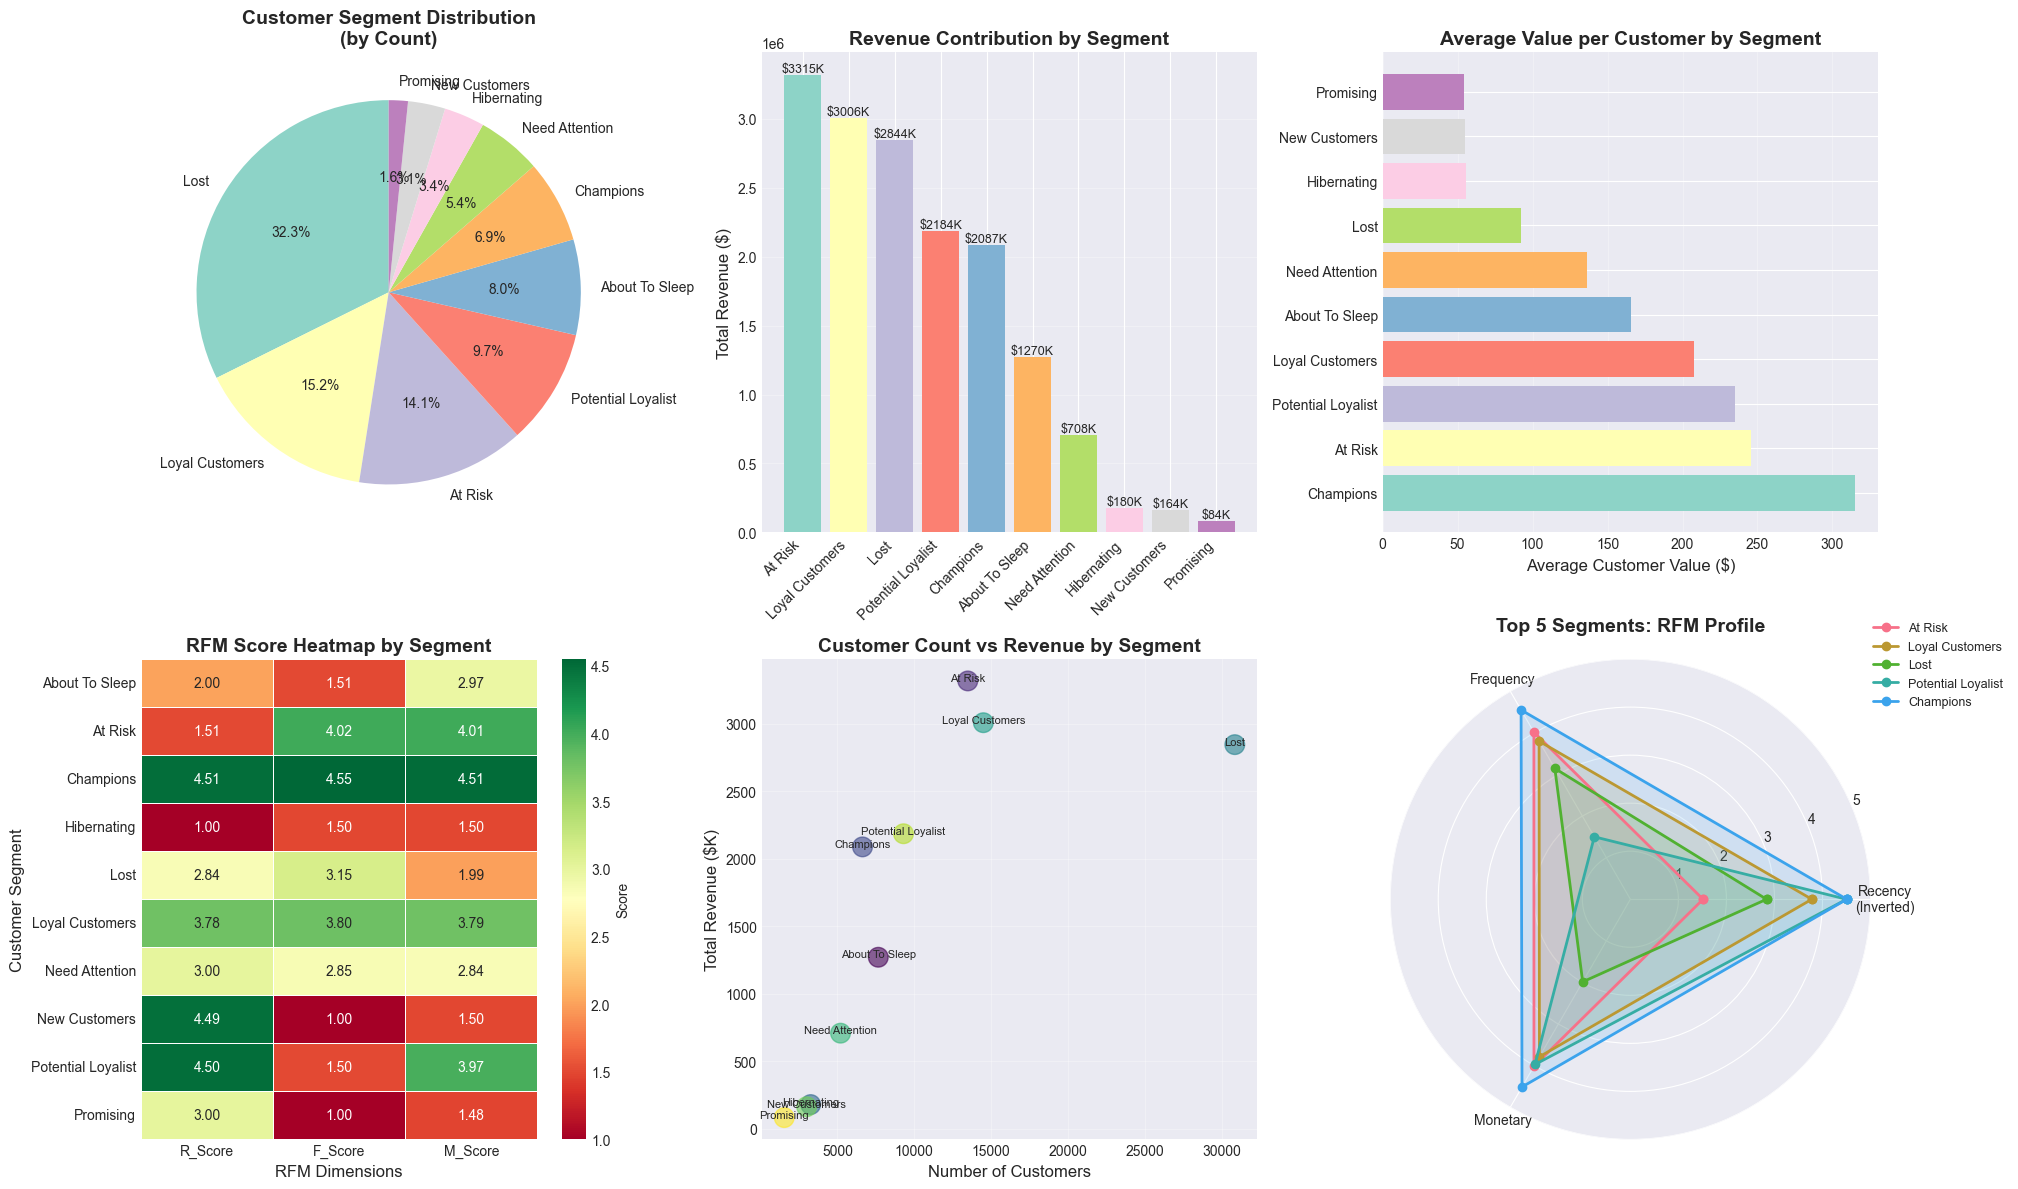


✅ Comprehensive visualization saved!
   File: reports/figures/segment_analysis_overview.png



In [19]:
print("="*60)
print("📊 CUSTOMER SEGMENT VISUALIZATION")
print("="*60)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Segment Distribution (Pie Chart)
ax1 = plt.subplot(2, 3, 1)
segment_counts = rfm_scored['Segment'].value_counts()
colors = plt.cm.Set3(range(len(segment_counts)))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Customer Segment Distribution\n(by Count)', fontsize=14, fontweight='bold')

# 2. Revenue by Segment (Bar Chart)
ax2 = plt.subplot(2, 3, 2)
segment_revenue = rfm_scored.groupby('Segment')['Monetary'].sum().sort_values(ascending=False)
bars = plt.bar(range(len(segment_revenue)), segment_revenue.values, color=colors[:len(segment_revenue)])
plt.xticks(range(len(segment_revenue)), segment_revenue.index, rotation=45, ha='right')
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Revenue Contribution by Segment', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, segment_revenue.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'${value/1000:.0f}K', ha='center', va='bottom', fontsize=9)

# 3. Average Customer Value by Segment
ax3 = plt.subplot(2, 3, 3)
avg_value = rfm_scored.groupby('Segment')['Monetary'].mean().sort_values(ascending=False)
bars = plt.barh(range(len(avg_value)), avg_value.values, color=colors[:len(avg_value)])
plt.yticks(range(len(avg_value)), avg_value.index, fontsize=10)
plt.xlabel('Average Customer Value ($)', fontsize=12)
plt.title('Average Value per Customer by Segment', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# 4. RFM Heatmap by Segment
ax4 = plt.subplot(2, 3, 4)
rfm_segment_avg = rfm_scored.groupby('Segment')[['R_Score', 'F_Score', 'M_Score']].mean()
sns.heatmap(rfm_segment_avg, annot=True, fmt='.2f', cmap='RdYlGn', 
            cbar_kws={'label': 'Score'}, linewidths=0.5)
plt.title('RFM Score Heatmap by Segment', fontsize=14, fontweight='bold')
plt.ylabel('Customer Segment', fontsize=12)
plt.xlabel('RFM Dimensions', fontsize=12)

# 5. Customer Count vs Revenue (Scatter)
ax5 = plt.subplot(2, 3, 5)
segment_summary = rfm_scored.groupby('Segment').agg({
    'customer_unique_id': 'count',
    'Monetary': 'sum'
}).reset_index()
segment_summary.columns = ['Segment', 'Customer_Count', 'Total_Revenue']

plt.scatter(segment_summary['Customer_Count'], 
           segment_summary['Total_Revenue']/1000,
           s=200, alpha=0.6, c=range(len(segment_summary)), cmap='viridis')

for i, row in segment_summary.iterrows():
    plt.annotate(row['Segment'], 
                (row['Customer_Count'], row['Total_Revenue']/1000),
                fontsize=8, ha='center')

plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Total Revenue ($K)', fontsize=12)
plt.title('Customer Count vs Revenue by Segment', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 6. Segment Characteristics (Radar Chart)
ax6 = plt.subplot(2, 3, 6, projection='polar')
categories = ['Recency\n(Inverted)', 'Frequency', 'Monetary']
top_segments = segment_revenue.head(5).index

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for segment in top_segments:
    values = rfm_scored[rfm_scored['Segment'] == segment][['R_Score', 'F_Score', 'M_Score']].mean().tolist()
    values += values[:1]
    ax6.plot(angles, values, 'o-', linewidth=2, label=segment)
    ax6.fill(angles, values, alpha=0.15)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories, fontsize=10)
ax6.set_ylim(0, 5)
ax6.set_yticks([1, 2, 3, 4, 5])
ax6.set_title('Top 5 Segments: RFM Profile', fontsize=14, fontweight='bold', pad=20)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax6.grid(True)



plt.tight_layout()
plt.savefig('D:\\Project\\DataMining\\ecommerce-customer-analytics\\reports\\figures\\segment_analysis_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Comprehensive visualization saved!")
print("   File: reports/figures/segment_analysis_overview.png")
print("\n" + "="*60)

# Phân tích kết quả:
* Phân bổ khách hàng: Pie chart cho thấy nhóm "Lost" chiếm lớn nhất (32.3%), tiếp theo là "Loyal Customers" (15.2%) và "At Risk" (14.1%). Điều này cảnh báo tỷ lệ khách hàng rời bỏ rất cao, cần ưu tiên xử lý.
* Đóng góp doanh thu: Bar chart cho thấy nhóm "At Risk" và "Loyal Customers" đóng góp doanh thu lớn nhất, nhưng nhóm "Lost" vẫn mang lại doanh thu đáng kể. Cơ hội lớn nếu tái kích hoạt nhóm này.
* Giá trị trung bình/khách hàng: "Champions" có giá trị cao nhất, tiếp theo là "At Risk" và "Potential Loyalist". Nên tập trung giữ chân nhóm này để tối ưu lợi nhuận.
* Heatmap RFM: Các nhóm có đặc điểm RFM rất khác biệt, giúp dễ dàng xác định chiến lược riêng cho từng phân khúc.
* Scatter plot: Nhóm đông khách chưa chắc mang lại doanh thu cao nhất, nhấn mạnh tầm quan trọng của chất lượng khách hàng.
* Radar chart: Top 5 phân khúc có profile RFM rõ ràng, hỗ trợ storytelling cho business.

# CELL 8: SEGMENT DEEP-DIVE ANALYSIS
* Mục đích:
    - Phân tích chi tiết từng segment
    - Hiểu behavior patterns của each segment
    - Identify opportunities và risks
* -> Nền tảng cho chiến lược tiếp thị
* -> Thông tin chi tiết dựa trên dữ liệu cho các quyết định kinh doanh

In [20]:
print("="*60)
print("🔍 SEGMENT DEEP-DIVE ANALYSIS")
print("="*60)

# Create comprehensive segment profile
def analyze_segment(segment_name):
    """Analyze detailed characteristics of a segment"""
    segment_data = rfm_scored[rfm_scored['Segment'] == segment_name]
    
    profile = {
        'Segment': segment_name,
        'Customer_Count': len(segment_data),
        'Percentage': len(segment_data) / len(rfm_scored) * 100,
        'Total_Revenue': segment_data['Monetary'].sum(),
        'Revenue_Percentage': segment_data['Monetary'].sum() / rfm_scored['Monetary'].sum() * 100,
        'Avg_Revenue': segment_data['Monetary'].mean(),
        'Avg_Recency': segment_data['Recency'].mean(),
        'Avg_Frequency': segment_data['Frequency'].mean(),
        'Avg_R_Score': segment_data['R_Score'].mean(),
        'Avg_F_Score': segment_data['F_Score'].mean(),
        'Avg_M_Score': segment_data['M_Score'].mean(),
    }
    
    return profile

# Analyze all segments
all_segments = rfm_scored['Segment'].unique()
segment_profiles = []

for segment in all_segments:
    profile = analyze_segment(segment)
    segment_profiles.append(profile)

# Create DataFrame
segment_df = pd.DataFrame(segment_profiles)
segment_df = segment_df.sort_values('Total_Revenue', ascending=False)

print("\n📊 COMPLETE SEGMENT PROFILES:")
print("="*60)

# Display with formatting
pd.options.display.float_format = '{:.2f}'.format
print(segment_df.to_string(index=False))

# Identify key segments
print("\n\n🎯 KEY SEGMENT INSIGHTS:")
print("="*60)

# Highest Revenue Segments
print("\n💰 TOP 3 REVENUE GENERATORS:")
for i, row in segment_df.head(3).iterrows():
    print(f"\n{i+1}. {row['Segment']}")
    print(f"   Customers: {row['Customer_Count']:,.0f} ({row['Percentage']:.1f}%)")
    print(f"   Revenue: ${row['Total_Revenue']:,.2f} ({row['Revenue_Percentage']:.1f}%)")
    print(f"   Avg Value: ${row['Avg_Revenue']:.2f}")
    print(f"   Profile: R={row['Avg_R_Score']:.1f}, F={row['Avg_F_Score']:.1f}, M={row['Avg_M_Score']:.1f}")

# Largest Segments by Customer Count
print("\n\n📊 TOP 3 LARGEST SEGMENTS (by customer count):")
largest_segments = segment_df.nlargest(3, 'Customer_Count')
for i, row in largest_segments.iterrows():
    print(f"\n{i+1}. {row['Segment']}")
    print(f"   Customers: {row['Customer_Count']:,.0f} ({row['Percentage']:.1f}%)")
    print(f"   Revenue: ${row['Total_Revenue']:,.2f} ({row['Revenue_Percentage']:.1f}%)")
    print(f"   Avg Recency: {row['Avg_Recency']:.0f} days")

# High-Value Low-Count Segments
print("\n\n💎 HIGH-VALUE SEGMENTS (High avg revenue per customer):")
high_value = segment_df.nlargest(3, 'Avg_Revenue')
for i, row in high_value.iterrows():
    print(f"\n{i+1}. {row['Segment']}")
    print(f"   Avg Customer Value: ${row['Avg_Revenue']:.2f}")
    print(f"   Customer Count: {row['Customer_Count']:,.0f}")
    print(f"   Total Revenue: ${row['Total_Revenue']:,.2f}")

# At-Risk Analysis
print("\n\n🚨 AT-RISK SEGMENTS (High recency, need attention):")
at_risk = segment_df.nlargest(3, 'Avg_Recency')
for i, row in at_risk.iterrows():
    print(f"\n{i+1}. {row['Segment']}")
    print(f"   Avg Days Inactive: {row['Avg_Recency']:.0f} days")
    print(f"   Customers: {row['Customer_Count']:,.0f}")
    print(f"   Revenue at Risk: ${row['Total_Revenue']:,.2f}")

print("\n" + "="*60)

# Save segment profiles
segment_df.to_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\segment_profiles.csv', index=False)
print("\n✅ Segment profiles saved: data/processed/segment_profiles.csv")
print("="*60)

🔍 SEGMENT DEEP-DIVE ANALYSIS

📊 COMPLETE SEGMENT PROFILES:
           Segment  Customer_Count  Percentage  Total_Revenue  Revenue_Percentage  Avg_Revenue  Avg_Recency  Avg_Frequency  Avg_R_Score  Avg_F_Score  Avg_M_Score
           At Risk           13485       14.13     3315482.56               20.93       245.86       442.52           1.08         1.51         4.02         4.01
   Loyal Customers           14497       15.19     3006290.30               18.97       207.37       201.40           1.06         3.78         3.80         3.79
              Lost           30866       32.35     2843955.34               17.95        92.14       307.84           1.01         2.84         3.15         1.99
Potential Loyalist            9300        9.75     2184471.52               13.79       234.89       139.02           1.00         4.50         1.50         3.97
         Champions            6631        6.95     2087103.41               13.17       314.75       139.23           1.18         

* Phân tích kết quả:
    * Phân tích chi tiết từng segment: Bảng tổng hợp cho thấy rõ quy mô, tỷ trọng, doanh thu, giá trị trung bình và đặc điểm RFM của từng phân khúc. Các nhóm lớn nhất là Lost, Loyal Customers, At Risk, mỗi nhóm có hành vi và giá trị khác biệt.
    * Hiểu behavior patterns: Nhóm Champions và Potential Loyalist có giá trị trung bình cao, nhưng số lượng ít. Nhóm Lost chiếm đông nhất nhưng giá trị thấp, trong khi At Risk vừa đông vừa có giá trị cao nhưng nguy cơ rời bỏ lớn (recency cao).
    * Identify opportunities & risks: Nhóm At Risk và About To Sleep có tổng doanh thu lớn nhưng nguy cơ mất khách cao (recency cao), là mục tiêu ưu tiên cho chiến dịch giữ chân. Nhóm Champions cần duy trì, nhóm Lost là cơ hội win-back nếu chọn lọc.
* Chiến lược:
1. Giữ chân nhóm giá trị cao (Champions, Loyal Customers, Potential Loyalist)
2. Ngăn chặn rủi ro mất khách (At Risk, About To Sleep):
3. Tận dụng cơ hội từ nhóm Lost:
4. Phát triển nhóm tiềm năng (New Customers, Promising):
5. Cải thiện nhóm giá trị thấp (Hibernating, Need Attention):

#  CELL 9: MARKETING STRATEGY & ROI
* Mục tiêu:
    - Xác định chiến lược tiếp thị cho từng phân khúc
    - Tính toán ROI kỳ vọng
    - Xây dựng kế hoạch triển khai khả thi

In [21]:
print("="*60)
print("🎯 SEGMENT-SPECIFIC MARKETING STRATEGIES & ROI")
print("="*60)

# Define strategies for each segment
segment_strategies = {
    'Champions': {
        'Priority': 'CRITICAL',
        'Goal': 'Retention & Advocacy',
        'Strategies': [
            'VIP Program with exclusive benefits',
            'Early access to new products',
            'Referral rewards program',
            'Personal account manager',
            'Premium customer support'
        ],
        'Marketing_Budget_Per_Customer': 50,
        'Expected_Retention_Rate': 0.95,
        'Expected_Revenue_Increase': 0.15,
        'Implementation_Timeline': '1 month'
    },
    
    'Loyal Customers': {
        'Priority': 'HIGH',
        'Goal': 'Upgrade to Champions',
        'Strategies': [
            'Loyalty points program',
            'Cross-sell campaigns',
            'Category expansion recommendations',
            'Birthday/Anniversary special offers',
            'Exclusive seasonal discounts'
        ],
        'Marketing_Budget_Per_Customer': 25,
        'Expected_Retention_Rate': 0.85,
        'Expected_Revenue_Increase': 0.20,
        'Implementation_Timeline': '1-2 months'
    },
    
    'Potential Loyalist': {
        'Priority': 'HIGH',
        'Goal': 'Convert to Loyal',
        'Strategies': [
            'Onboarding email series',
            'Second purchase discount (15-20%)',
            'Personalized product recommendations',
            'Category education content',
            'Time-limited offers'
        ],
        'Marketing_Budget_Per_Customer': 20,
        'Expected_Retention_Rate': 0.60,
        'Expected_Revenue_Increase': 0.35,
        'Implementation_Timeline': '2-3 months'
    },
    
    'New Customers': {
        'Priority': 'MEDIUM',
        'Goal': 'Convert to Repeat Buyers',
        'Strategies': [
            'Welcome series (3-5 emails)',
            'First repeat purchase incentive',
            'Product usage tips',
            'Customer satisfaction survey',
            'Social proof & reviews'
        ],
        'Marketing_Budget_Per_Customer': 15,
        'Expected_Retention_Rate': 0.40,
        'Expected_Revenue_Increase': 0.50,
        'Implementation_Timeline': '1 month'
    },
    
    'At Risk': {
        'Priority': 'URGENT',
        'Goal': 'Prevent Churn',
        'Strategies': [
            'Win-back email campaign',
            'Special discount (25-30%)',
            '"We miss you" personalized message',
            'Survey: Why did you stop buying?',
            'Free shipping offer'
        ],
        'Marketing_Budget_Per_Customer': 30,
        'Expected_Retention_Rate': 0.35,
        'Expected_Revenue_Increase': 0.25,
        'Implementation_Timeline': 'Immediate'
    },
    
    'Cannot Lose Them': {
        'Priority': 'CRITICAL',
        'Goal': 'Emergency Retention',
        'Strategies': [
            'Personal phone call from management',
            'VIP exclusive offer (40%+ discount)',
            'Problem resolution priority',
            'Account manager assignment',
            'Lifetime loyalty rewards'
        ],
        'Marketing_Budget_Per_Customer': 100,
        'Expected_Retention_Rate': 0.70,
        'Expected_Revenue_Increase': 0.10,
        'Implementation_Timeline': 'Immediate (24-48 hours)'
    },
    
    'Hibernating': {
        'Priority': 'LOW-MEDIUM',
        'Goal': 'Cost-Effective Reactivation',
        'Strategies': [
            'Automated win-back sequence',
            'Aggressive discount (30%)',
            'Product catalog update',
            'Clearance/sale notifications',
            'Seasonal campaigns'
        ],
        'Marketing_Budget_Per_Customer': 5,
        'Expected_Retention_Rate': 0.10,
        'Expected_Revenue_Increase': 0.30,
        'Implementation_Timeline': '3-6 months'
    },
    
    'About To Sleep': {
        'Priority': 'MEDIUM',
        'Goal': 'Wake Up Before Lost',
        'Strategies': [
            'Re-engagement campaign',
            'Time-sensitive offers',
            'New product launches',
            'Flash sales notification',
            'Preference update survey'
        ],
        'Marketing_Budget_Per_Customer': 10,
        'Expected_Retention_Rate': 0.25,
        'Expected_Revenue_Increase': 0.40,
        'Implementation_Timeline': '1-2 months'
    },
    
    'Promising': {
        'Priority': 'MEDIUM',
        'Goal': 'Increase Frequency & Value',
        'Strategies': [
            'Category expansion campaigns',
            'Bundle offers',
            'Upsell opportunities',
            'Product education content',
            'Loyalty program enrollment'
        ],
        'Marketing_Budget_Per_Customer': 12,
        'Expected_Retention_Rate': 0.50,
        'Expected_Revenue_Increase': 0.30,
        'Implementation_Timeline': '2-3 months'
    },
    
    'Need Attention': {
        'Priority': 'MEDIUM-HIGH',
        'Goal': 'Prevent Decline',
        'Strategies': [
            'Feedback survey',
            'Service recovery',
            'Special attention offers',
            'Product quality assurance',
            'Engagement monitoring'
        ],
        'Marketing_Budget_Per_Customer': 18,
        'Expected_Retention_Rate': 0.55,
        'Expected_Revenue_Increase': 0.20,
        'Implementation_Timeline': '1 month'
    },
    
    'Lost': {
        'Priority': 'LOW',
        'Goal': 'Cost Analysis',
        'Strategies': [
            'Exit survey (understand why)',
            'Minimal cost reactivation attempt',
            'Database cleaning',
            'Learn from churn patterns',
            'No aggressive spending'
        ],
        'Marketing_Budget_Per_Customer': 2,
        'Expected_Retention_Rate': 0.05,
        'Expected_Revenue_Increase': 0.10,
        'Implementation_Timeline': 'Ongoing/Low priority'
    }
}

# Calculate ROI for each segment
print("\n💰 ROI CALCULATIONS BY SEGMENT:")
print("="*60)

roi_results = []

for segment in segment_df['Segment']:
    if segment in segment_strategies:
        seg_data = segment_df[segment_df['Segment'] == segment].iloc[0]
        strategy = segment_strategies[segment]
        
        # Calculations
        customer_count = seg_data['Customer_Count']
        avg_customer_value = seg_data['Avg_Revenue']
        total_segment_revenue = seg_data['Total_Revenue']
        
        # Marketing costs
        total_marketing_cost = customer_count * strategy['Marketing_Budget_Per_Customer']
        
        # Expected retained customers
        retained_customers = customer_count * strategy['Expected_Retention_Rate']
        
        # Expected revenue increase
        revenue_increase = retained_customers * avg_customer_value * strategy['Expected_Revenue_Increase']
        
        # ROI calculation
        roi = ((revenue_increase - total_marketing_cost) / total_marketing_cost) * 100 if total_marketing_cost > 0 else 0
        
        result = {
            'Segment': segment,
            'Priority': strategy['Priority'],
            'Customer_Count': customer_count,
            'Marketing_Cost': total_marketing_cost,
            'Expected_Revenue_Increase': revenue_increase,
            'Net_Profit': revenue_increase - total_marketing_cost,
            'ROI_Percentage': roi,
            'Timeline': strategy['Implementation_Timeline']
        }
        
        roi_results.append(result)

# Create ROI DataFrame
roi_df = pd.DataFrame(roi_results)
roi_df = roi_df.sort_values('Net_Profit', ascending=False)

print(roi_df.to_string(index=False))

# Summary
print("\n\n📊 OVERALL PROGRAM IMPACT:")
print("="*60)
total_marketing_investment = roi_df['Marketing_Cost'].sum()
total_expected_revenue = roi_df['Expected_Revenue_Increase'].sum()
total_net_profit = roi_df['Net_Profit'].sum()
overall_roi = (total_net_profit / total_marketing_investment) * 100

print(f"Total Marketing Investment: ${total_marketing_investment:,.2f}")
print(f"Expected Revenue Increase: ${total_expected_revenue:,.2f}")
print(f"Expected Net Profit: ${total_net_profit:,.2f}")
print(f"Overall ROI: {overall_roi:.1f}%")

# Priority recommendations
print("\n\n🎯 IMPLEMENTATION PRIORITY RANKING:")
print("="*60)
priority_order = ['CRITICAL', 'URGENT', 'HIGH', 'MEDIUM-HIGH', 'MEDIUM', 'LOW-MEDIUM', 'LOW']
for priority in priority_order:
    priority_segments = roi_df[roi_df['Priority'] == priority]
    if len(priority_segments) > 0:
        print(f"\n{priority}:")
        for _, row in priority_segments.iterrows():
            print(f"  • {row['Segment']}: ${row['Net_Profit']:,.0f} profit ({row['Timeline']})")


# Save results
roi_df.to_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\segment_roi_analysis.csv', index=False)
print("\n\n✅ ROI analysis saved: data/processed/segment_roi_analysis.csv")
print("="*60)

🎯 SEGMENT-SPECIFIC MARKETING STRATEGIES & ROI

💰 ROI CALCULATIONS BY SEGMENT:
           Segment    Priority  Customer_Count  Marketing_Cost  Expected_Revenue_Increase  Net_Profit  ROI_Percentage             Timeline
Potential Loyalist        HIGH            9300          186000                  458739.02   272739.02          146.63           2-3 months
   Loyal Customers        HIGH           14497          362425                  511069.35   148644.35           41.01           1-2 months
    About To Sleep      MEDIUM            7657           76570                  127028.03    50458.03           65.90           1-2 months
         Promising      MEDIUM            1536           18432                   12526.31    -5905.69          -32.04           2-3 months
       Hibernating  LOW-MEDIUM            3255           16275                    5404.04   -10870.96          -66.80           3-6 months
     New Customers      MEDIUM            2993           44895                   32790.5

* Phân tích kết quả:
    * Tổng đầu tư marketing: $1,596,029
    * Doanh thu tăng kỳ vọng: $1,827,215
    * Lợi nhuận ròng: $231,186
    * ROI toàn chương trình: 14.5%
* Top segment sinh lời:
    * Potential Loyalist: Lợi nhuận $272,739 (ROI 146.6%), nên ưu tiên đầu tư.
    * Loyal Customers: Lợi nhuận $148,644 (ROI 41%), hiệu quả cao.
    * About To Sleep: Lợi nhuận $50,458 (ROI 65.9%), nên triển khai.
* Các segment lỗ lớn:
    * At Risk: Lỗ $114,445 (ROI -28%), chi phí cao, hiệu quả thấp.
    * Champions: Lỗ $34,138 (ROI -10%), cần tối ưu lại ngân sách.
    * Lost, Hibernating, New Customers, Promising, Need Attention: Đều có ROI âm, không nên đầu tư mạnh.

# CELL 10: EXPORT & SUMMARY
* Mục đích:
    - Xuất dữ liệu cuối cùng
    - Tạo bản tóm tắt điều hành
    - Chuẩn bị dữ liệu cho bảng điều khiển

In [22]:
print("="*60)
print("💾 EXPORT FINAL RESULTS & EXECUTIVE SUMMARY")
print("="*60)

# Save comprehensive RFM dataset
rfm_scored.to_csv('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\rfm_scored_segments.csv', index=False)
print("\n✅ Saved: data/processed/rfm_scored_segments.csv")

# Create executive summary
executive_summary = {
    'Total_Customers': len(rfm_scored),
    'Total_Revenue': rfm_scored['Monetary'].sum(),
    'Avg_Customer_Value': rfm_scored['Monetary'].mean(),
    'Total_Segments': rfm_scored['Segment'].nunique(),
    'Top_Segment_By_Revenue': segment_df.iloc[0]['Segment'],
    'Top_Segment_Revenue': segment_df.iloc[0]['Total_Revenue'],
    'Largest_Segment': segment_df.nlargest(1, 'Customer_Count').iloc[0]['Segment'],
    'Largest_Segment_Size': segment_df.nlargest(1, 'Customer_Count').iloc[0]['Customer_Count'],
    'Expected_Marketing_Investment': roi_df['Marketing_Cost'].sum(),
    'Expected_Revenue_Increase': roi_df['Expected_Revenue_Increase'].sum(),
    'Expected_ROI': overall_roi,
    'Analysis_Date': datetime.now().strftime('%Y-%m-%d')
}

# Save summary
import json
with open('D:\\Project\\DataMining\\ecommerce-customer-analytics\\data\\processed\\executive_summary.json', 'w') as f:
    json.dump(executive_summary, f, indent=2, default=str)

print("✅ Saved: data/processed/executive_summary.json")

# Print summary
print("\n" + "="*60)
print("📋 EXECUTIVE SUMMARY")
print("="*60)
for key, value in executive_summary.items():
    if isinstance(value, float):
        if 'ROI' in key or 'Percentage' in key:
            print(f"{key.replace('_', ' ')}: {value:.1f}%")
        else:
            print(f"{key.replace('_', ' ')}: ${value:,.2f}")
    elif isinstance(value, int):
        print(f"{key.replace('_', ' ')}: {value:,}")
    else:
        print(f"{key.replace('_', ' ')}: {value}")

print("\n" + "="*60)
print("🎉 NOTEBOOK 02 COMPLETED SUCCESSFULLY!")
print("="*60)
print("\n📁 Files Created:")
print("  • rfm_scored_segments.csv")
print("  • segment_profiles.csv")
print("  • segment_roi_analysis.csv")
print("  • executive_summary.json")
print("  • segment_analysis_overview.png")
print("\n🎯 Ready for BUỔI 1 Presentation!")
print("="*60)

💾 EXPORT FINAL RESULTS & EXECUTIVE SUMMARY

✅ Saved: data/processed/rfm_scored_segments.csv
✅ Saved: data/processed/executive_summary.json

📋 EXECUTIVE SUMMARY
Total Customers: 95,420
Total Revenue: $15,843,553.24
Avg Customer Value: $166.04
Total Segments: 10
Top Segment By Revenue: At Risk
Top Segment Revenue: $3,315,482.56
Largest Segment: Lost
Largest Segment Size: 30866
Expected Marketing Investment: 1596029
Expected Revenue Increase: $1,827,215.15
Expected ROI: 14.5%
Analysis Date: 2025-10-07

🎉 NOTEBOOK 02 COMPLETED SUCCESSFULLY!

📁 Files Created:
  • rfm_scored_segments.csv
  • segment_profiles.csv
  • segment_roi_analysis.csv
  • executive_summary.json
  • segment_analysis_overview.png

🎯 Ready for BUỔI 1 Presentation!


* Tóm tắt kết quả:
* Dữ liệu đã xuất:
    * 95,420 khách hàng, 10 phân khúc
    * File chính: rfm_scored_segments.csv, segment_profiles.csv, segment_roi_analysis.csv, executive_summary.json, segment_analysis_overview.png
* Tóm tắt:
    * Tổng doanh thu: $15,843,553
    * Giá trị trung bình/khách: $166
    * Phân khúc lớn nhất: Lost (30,866 KH, 32.3%)
    * Phân khúc doanh thu cao nhất: At Risk ($3,315,483, 21%)
    * Tổng đầu tư marketing dự kiến: $1,596,029
    * Doanh thu tăng kỳ vọng: $1,827,215
    * ROI kỳ vọng: 14.5%